In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


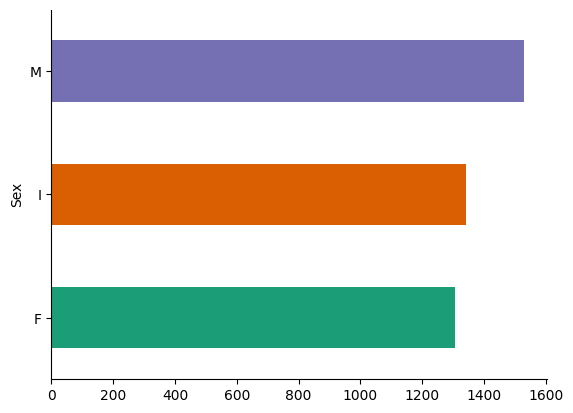

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [ ]:
y['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [ ]:
y.shape

(4177, 1)

In [ ]:
X.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [ ]:
y.isnull().sum()

Rings    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Sex'], drop_first=False)

In [ ]:
X_encoded.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
X_encoded = StandardScaler().fit_transform(X_encoded)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((2923, 10), (627, 10), (627, 10))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((2923, 1), (627, 1), (627, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create a Linear Regression model
linear_model = LinearRegression()

Number of Folds (k): 5
R-squared for each fold during training:
Fold 1: 0.5746
Fold 2: 0.3974
Fold 3: 0.5376
Fold 4: 0.5322
Fold 5: 0.5066
Mean R-squared: 0.5097
Standard Deviation of R-squared: 0.0602

Number of Folds (k): 10
R-squared for each fold during training:
Fold 1: 0.5359
Fold 2: 0.6106
Fold 3: 0.3123
Fold 4: 0.4930
Fold 5: 0.5248
Fold 6: 0.5548
Fold 7: 0.5592
Fold 8: 0.5106
Fold 9: 0.5482
Fold 10: 0.4595
Mean R-squared: 0.5109
Standard Deviation of R-squared: 0.0767



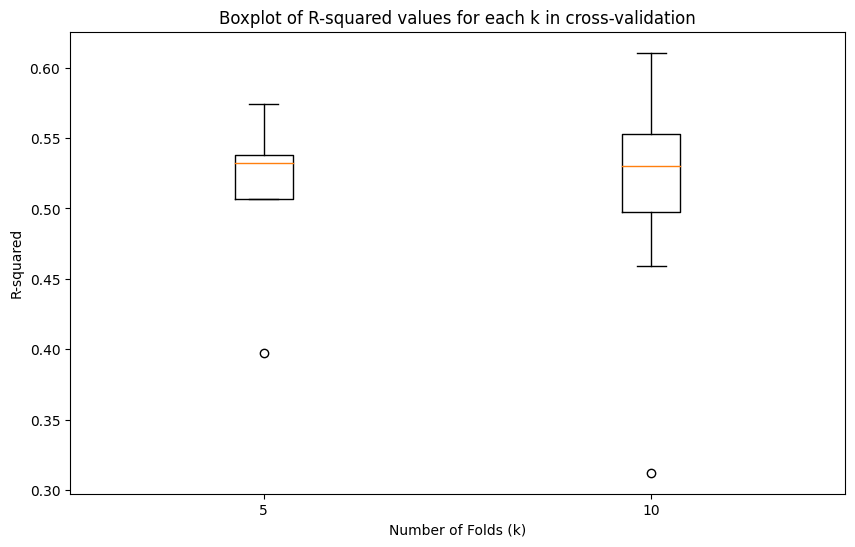

In [ ]:
k_values = [5, 10]  # Add more values as needed

# Lists to store R-squared values for each fold
r2_values = []

for k in k_values:
    # Create a k-fold cross-validator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    cv_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='r2')

    # Append R-squared values to the list
    r2_values.append(cv_scores)

    # Print R-squared for each fold during training
    print(f'Number of Folds (k): {k}')
    print('R-squared for each fold during training:')
    for i, score in enumerate(cv_scores):
        print(f'Fold {i + 1}: {score:.4f}')

    # Print mean and standard deviation of R-squared scores
    mean_r2 = np.mean(cv_scores)
    std_r2 = np.std(cv_scores)
    print(f'Mean R-squared: {mean_r2:.4f}')
    print(f'Standard Deviation of R-squared: {std_r2:.4f}\n')

# Plot boxplots for R-squared values
plt.figure(figsize=(10, 6))
plt.boxplot(r2_values, labels=k_values)
plt.title('Boxplot of R-squared values for each k in cross-validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('R-squared')
plt.show()

In [ ]:
# Train the model on the entire training set
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = linear_model.predict(X_test)

# Evaluate R-squared on the test set
r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared on the test set: {r2_test:.4f}')

R-squared on the test set: 0.5513


In [ ]:
# Train the model on the entire training set
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_encoded)

# Evaluate R-squared on the test set
r2_test = r2_score(y, y_pred)
print(f'R-squared on the over entire dataset: {r2_test:.4f}')

R-squared on the over entire dataset: 0.5372


## Non-linear Transformation

### PolynomialTranformation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Apply polynomial features
degree = 2  # Adjust the degree based on your preferences
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_poly = poly.transform(X_encoded)

In [ ]:
# Train a linear regression model on the polynomial features
linear_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_poly)

# Evaluate R-squared on the test set
r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set with polynomial features: {r2:.4f}')

R-squared on the test set with polynomial features: 0.5792


In [ ]:
# Make predictions on the test set
y_pred = linear_model.predict(X_poly)

# Evaluate R-squared on the test set
r2 = r2_score(y, y_pred)
print(f'R-squared on the entire datatest set with polynomial features: {r2:.4f}')

R-squared on the entire datatest set with polynomial features: 0.5844


### PowerTranform

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
power_transformer = PowerTransformer()
X_train_transformed = power_transformer.fit_transform(X_train)
X_test_transformed = power_transformer.transform(X_test)
X_transformed = power_transformer.transform(X_encoded)

In [ ]:
# Train a linear regression model on the polynomial features
linear_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_transformed)

# Evaluate R-squared on the test set
r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set with polynomial features: {r2:.4f}')

R-squared on the test set with polynomial features: 0.5506


In [ ]:
# Make predictions on the test set
y_pred = linear_model.predict(X_transformed)

# Evaluate R-squared on the test set
r2 = r2_score(y, y_pred)
print(f'R-squared on the entire datatest set with polynomial features: {r2:.4f}')

R-squared on the entire datatest set with polynomial features: 0.5474
